# Lecture 26 Linear Regression
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron: Chapter 4

Additional:
* [YouTube: Serrano Academy - The Covariance Matrix](https://www.youtube.com/watch?v=WBlnwvjfMtQ)

## Regression
We have just finished talking about a number of machine learning classification models. As a reminder, classification is a form of discrete, supervised learning.

[Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_ML_Landscape.png)

Now, we will turn our attention to regression, which would be a form of continuous, supervised learning. As we can see in our diagram, there are a number of regression models to choose from. Today, we will focus on linear regression, polynomial regression, and logistic regression.

The difference between regression and classification is that with classification, every datapoint will point to a specific class or category. With regression, however, we are dealing with continuous variables, so we are looking at a result that could be anywhere on a number scale. Most common model predictions, such as weather predictions, use regression models.

-----
## Variance, Covariance, Correlation
We've already learned about linear regression. It is a model that we learned about in basics statistics classes. The idea is to find a line that fits through the middle of your data and then use that line to estimate a result based on your inputs.

<Axes: xlabel='petal_length', ylabel='petal_width'>

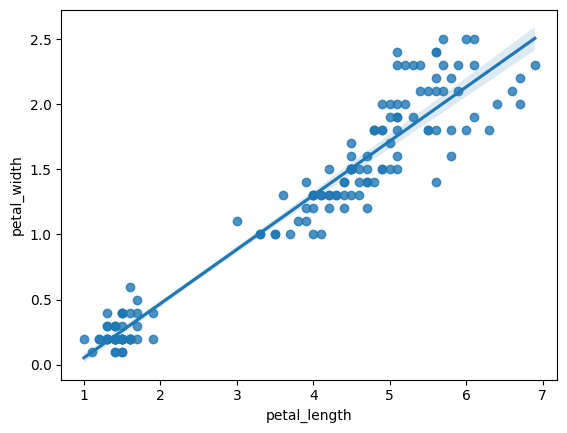

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.regplot(data=iris, x='petal_length', y='petal_width')

Define two datasets,
$$X=\{x_0,x_1,x_2,\dots\}\qquad Y=\{y_0,y_1,y_2\}$$

The __mean__ of the two datasets are found as,
$$(\mu_x,\mu_y) = \left(\frac{1}{n}\sum_{i=1}^n x_i, \frac{1}{n}\sum_{i=1}^n y_i\right)$$

The __variance__ is the average squared distance from the mean.
$$var(X) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\mu_x)^2 \qquad\qquad var(Y) = \frac{1}{n-1}\sum_{i=1}^n (y_i-\mu_y)^2$$

But the variance doesn't tell the whole story. Look at the variance of these two datasets:
| $X_1$ | $Y_1$ |     | $X_2$ | $Y_2$ |
| :---: | :---: | --- | :---: | :---: |
|  -2   |   1   |     |  -2   |  -1   |
|   0   |   1   |     |   0   |  -1   |
|   0   |  -1   |     |   0   |   1   |
|   2   |  -1   |     |   2   |   1   |

$$var(X_1) = 2 \qquad var(X_2) = 2$$
$$var(Y_1) = 1 \qquad var(Y_2) = 1$$

They have the same variance, but the behavior is very different. So, we need to look at the how the variances of the two variables relate with each other. 
* Note the extreme points. 
  * If the product of the extreme points is negative, that means we are in quandrants II and IV, so we have a negative relationship.
  * If the product of the extreme points is positive, that means we are in quandrants I and III, so we have a positive relationship.

The __covariance__ is then the average product of the different dimensions.
$$cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\mu_x)(y_i-\mu_y)$$

Finally, the __correlation__, which tells us the strength of the relationship between the two variables, is,
$$corr[A,B] = \frac{cov[X,Y]}{\sigma_x\sigma_y}= \frac{1}{n-1}\sum\left(\frac{x-\mu_x}{\sigma_x}\frac{y-\mu_y}{\sigma_y}\right)$$

-----
#### Linear Algebra method (optional in lecture)
There is a more effective way using Linear Algebra:
$$E[X] = \sum_{i=1}^n x_i P(x_i) \qquad\qquad var[X] = E[X^2] - E[X]^2$$
$$cov[X,Y] = E\left[(X-E[X])(Y-E[Y])\right] = \frac{\left<X-E[X],Y-E[Y]\right>}{n-1}$$
where $E[X]$ is the expected value, and $P(x)$ is the probability of that point being randomly chosen from the dataset. In most cases, $P(x) = 1/n$. To simplify the covariance equation, let $\bar{X} = X-E[X]$ and $\bar{Y} = Y-E[Y]$.

$$cov[X,Y] = \frac{\left<\bar{X},\bar{Y}\right>}{n-1} \qquad\qquad corr[X,Y] = \frac{\left<\bar{X},\bar{Y}\right>}{\|\bar{X}\|\|\bar{Y}\|}$$

-----

#### Example
* Find the variance of A and of B, then find the covariance between them

|  A  |  B  |
| --- | --- |
|  2  |  16 |
|  3  |  10 |
|  4  |  7  |

$$A-\mu_A = [-1,0,1] \qquad var[A] = \frac{1}{3-1}\left[(-1)^2+0^2+1^2\right] = \frac{1}{2}(2) = 1.0$$
$$B-\mu_B = [5,-1,-4] \qquad var[B] = \frac{1}{3-1}\left[5^2+(-1)^2+(-4)^2\right] = \frac{1}{2}(42) = 21.0$$
$$cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^n (a_i-\mu_A)(b_i-\mu_B) = \frac{1}{3-1}\left(-5+0-4\right) \frac{-9}{2} = -4.5$$

In [34]:
import numpy as np
A = np.array([2,3,4])
B = np.array([16,10,7])

print('The default for var(x) is 1/n (a population). Default argument for this is ddof=0')
print(np.var(A))
print(np.var(B))

print('\nTo make it a sample [1/(n-1)], change ddof=1')
print(np.var(A, ddof=1))
print(np.var(B, ddof=1))

print('\nThe default for the covariance is ddof=1')
print(np.cov(A,B))

The default for var(x) is 1/n (a population). Default argument for this is ddof=0
0.6666666666666666
14.0

To make it a sample [1/(n-1)], change ddof=1
1.0
21.0

The default for the covariance is ddof=1
[[ 1.  -4.5]
 [-4.5 21. ]]


The correlation is then,
$$corr[X,Y]=\frac{cov[X,Y]}{\sigma_x\sigma_y} = \frac{cov[X,Y]}{\sqrt{var[X] var[Y]}}$$
where the standard deviation of $X$ is $\sigma_x=\sqrt{Var[X]}$. The ($n-1$) terms from the last equation cancel each other out.

Example:
* Find the correlation between A and B
    * Let $\bar{A} = A-E[A] = [-1,0,1]$
    * Let $\bar{B} = B-E[B] = [5,-1,-4]$
      $$var[A] = 1.0 \qquad var[B] = 21.0 \qquad cov[A,B] = -4.5$$
      $$corr[A,B]=\frac{cov[A,B]}{\sigma_x\sigma_y} = \frac{-4.5}{\sqrt{1*21}} = \frac{-4.5}{\sqrt{21}}=-0.9820$$

In [21]:
np.corrcoef(A,B)

array([[ 1.        , -0.98198051],
       [-0.98198051,  1.        ]])

## Linear Regression
Finally, to get the linear regression equation,
$$y = b_0 + b_1x \qquad\qquad \text{slope } = b_1 = \frac{cov[X,Y]}{\sigma_x\sigma_x} = \frac{cov[X,Y]}{var[X]} \qquad\qquad \text{intercept } = b_0 = \bar{y} - b_1\bar{x}$$

Back to our example,
$$y = b_0 + b_1x \qquad\qquad b_1 = \frac{-4.5}{1.0} = -4.5 \qquad\qquad b_0 = 11 - (-4.5)(3) = 24.5$$
$$y = 24.5 - 4.5x$$

## Python hint: returning multiple values from a function
You can return multiple values from a function within python. This is useful when you need to return both a weight and a bias in your model.

In [3]:
def lin_reg(x,y):
    a = x+y   # put your function here
    b = x*y   # put your function here
    return a, b

b0, b1 = lin_reg(4,7)
print(f"b0 = {b0} and b1 = {b1}")

b0 = 11 and b1 = 28


## Linear Regression with Iris Dataset
Find the linear regression line for the iris dataset using the Petal Length and the Petal Width. Then test it with the following numbers and evaluate using a MSE.
| Petal Length | Petal Width |
| :----------: | :---------: |
|  3.0         |   0.9       |
|  2.5         |   0.8       |
|  5.0         |   1.2       |
|  4.3         |   1.5       |
|  1.2         |   0.2       |

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


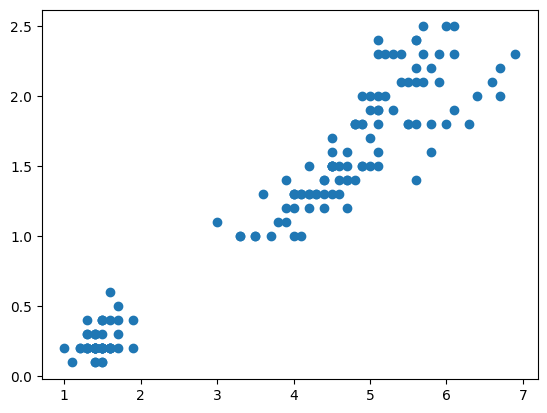

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
display(iris.head())

plt.scatter(iris['petal_length'], iris['petal_width'])

y = -0.3735614867864949 + 0.4185457211601459x


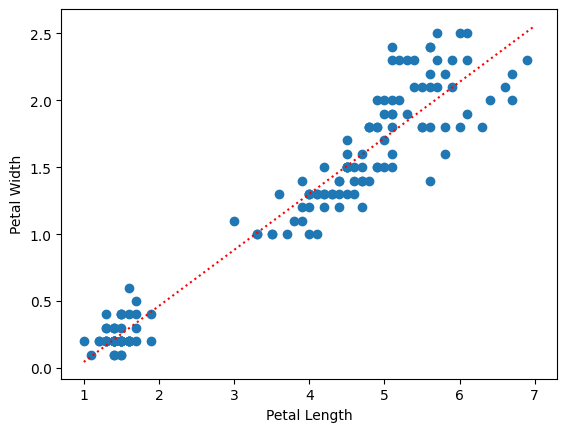

In [40]:
# Train model

X = iris['petal_length'] - iris['petal_length'].mean()
Y = iris['petal_width'] - iris['petal_width'].mean()


b1 = np.cov(X,Y)[1,0]/np.var(X)
b0 = (iris['petal_width'].mean()) - b1*(iris['petal_length'].mean())

print(f"y = {b0} + {b1}x")

plt.scatter(iris['petal_length'], iris['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Show linear regression
x_line = np.linspace(1,7,100)
y_line = b0 + b1*x_line

plt.plot(x_line, y_line, c='red', linestyle=':')

plt.show()

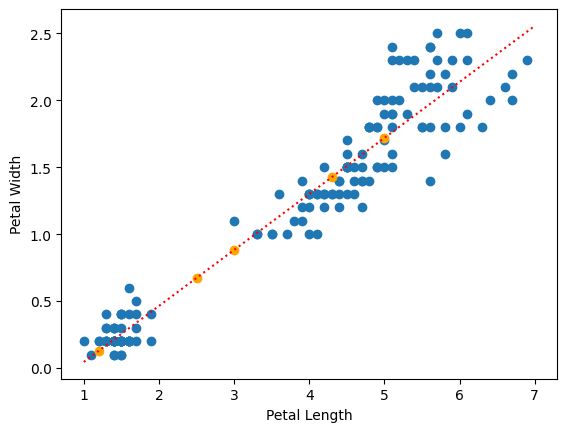

In [42]:
# Make predictions using the regression line
X_test = np.array([3, 2.5, 5, 4.3, 1.2])
y_true = np.array([0.9, 0.8, 1.2, 1.5, 0.2])
y_pred = b0 + b1*X_test

plt.scatter(iris['petal_length'], iris['petal_width'])
plt.plot(x_line, y_line, c='red', linestyle=':')
plt.scatter(X_test, y_pred, c='orange')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

In [45]:
mse = (1/len(y_true))*((y_true - y_pred)**2).sum()
print(f"MSE = {mse:0.4f}. That is {100*mse/y_true.mean():0.4f}% of the true mean")

MSE = 0.0593. That is 6.4471% of the true mean
